**▶ TASK-4 : SALES PREDICTION USING PYTHON**
* Author: Sabeel Ahmad
* Domain: Data Science

***IMPORTING LIBRARIES***

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

***IMPORTING DATASET***

In [4]:
df = pd.read_csv("/content/drive/MyDrive/Codsoft/advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


*Aim: Sales prediction involves forecasting the amount of a product that customer will purchase, taking into account various factors such as advertising expenditure, target audience segmentation, and advertising platform selection.*

* Given dataset consist of the advertising platform and the related sales. Let's visualize each platform

In [5]:
df.shape

(200, 4)

In [6]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


**Basic Observation**

* Avg expense spend is highest on TV
* Avg expense spend is lowest on Radio
* Max sale is 27 and min is 1.6

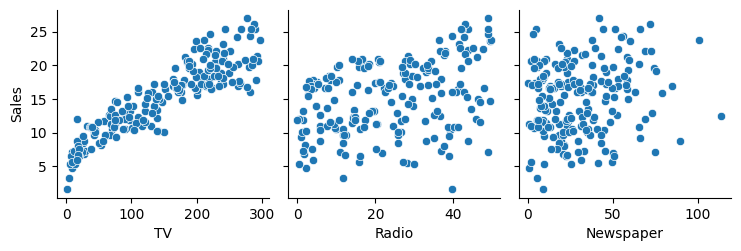

In [7]:
sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', kind='scatter')
plt.show()

Pair Plot Observation

When advertising cost is increases in TV Ads the sales will increase as well. While the for newspaper and radio it is bit unpredictable.

<Axes: ylabel='Frequency'>

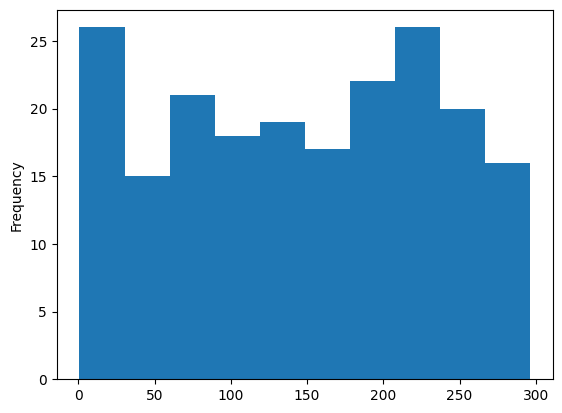

In [8]:
df['TV'].plot.hist(bins=10)

<Axes: ylabel='Frequency'>

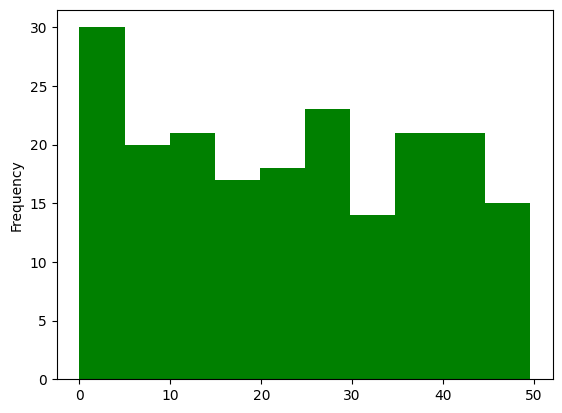

In [9]:
df['Radio'].plot.hist(bins=10, color="green", xlabel="Radio")

<Axes: ylabel='Frequency'>

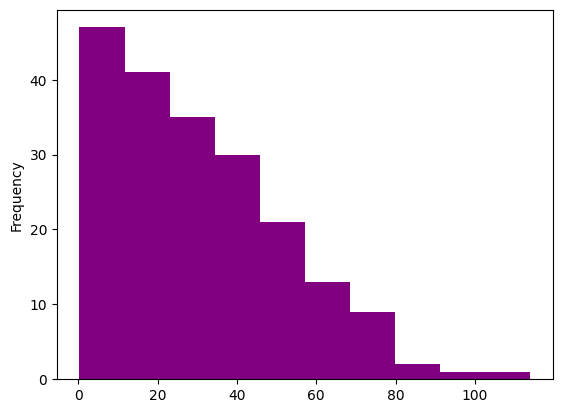

In [10]:
df['Newspaper'].plot.hist(bins=10, color="purple", xlabel="newspaper")

**Histogram Observation**

The majority sales is the result of low advertising cost in newspaper

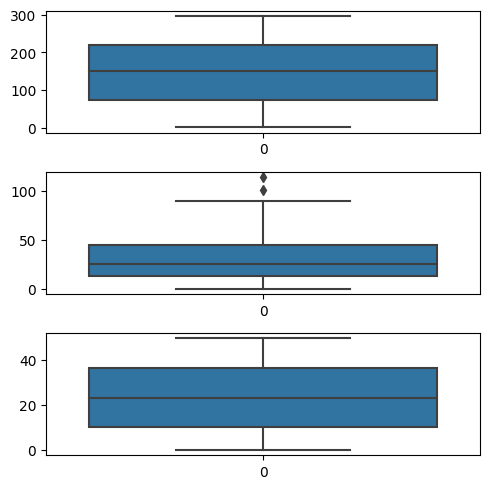

In [17]:
# Outlier Analysis
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['Radio'], ax = axs[2])
plt.tight_layout()

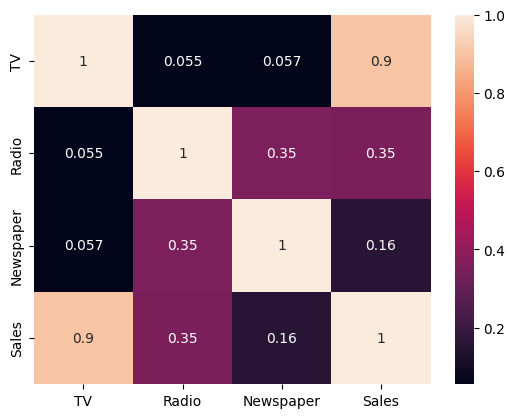

In [ ]:
sns.heatmap(df.corr(),annot = True)
plt.show()

**MODEL BUILDING**

In [19]:
X = df['TV']
y = df['Sales']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [21]:
# Let's now take a look at the train dataset

X_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [22]:
y_train.head()

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
Name: Sales, dtype: float64

***Building a Linear Model***

In [24]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [25]:
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
lr.params

const    6.948683
TV       0.054546
dtype: float64

In [26]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Wed, 04 Oct 2023   Prob (F-statistic):           1.52e-52
Time:                        07:53:27   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.0

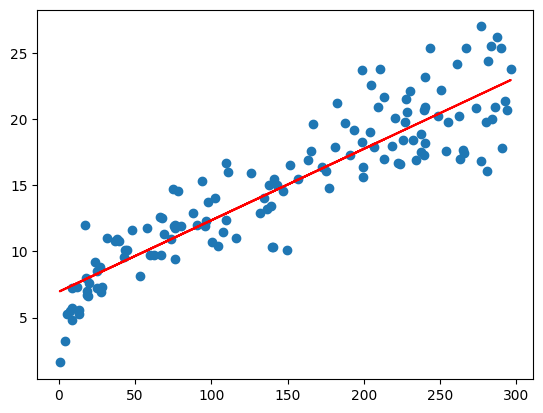

In [27]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')
plt.show()

**Model Evaluation**

In [28]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

<ipython-input-29-723b49e70e34>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins = 15)


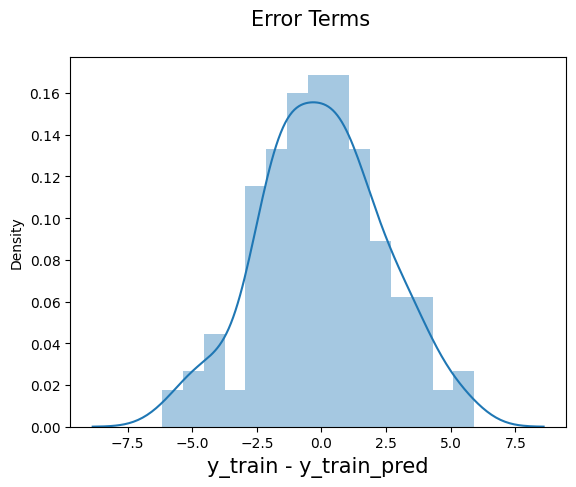

In [29]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

The residuals are following the normally distributed with a mean 0. All good!

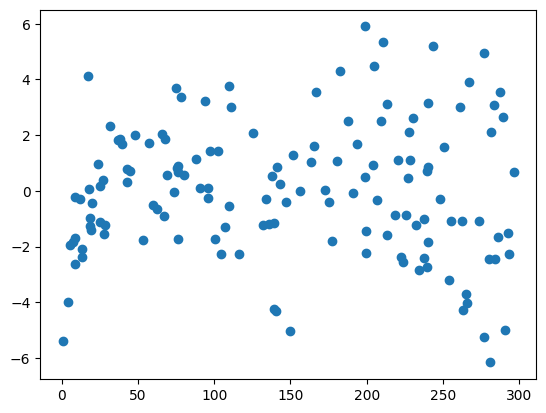

In [30]:
#Looking for patterns in the residuals
plt.scatter(X_train,res)
plt.show()

***Predictions on the Test Set***

In [31]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

In [32]:
y_pred.head()

126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
dtype: float64

In [34]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

2.019296008966232

In [35]:
#Checking the R-squared on the test set
r_squared = r2_score(y_test, y_pred)
r_squared

0.792103160124566

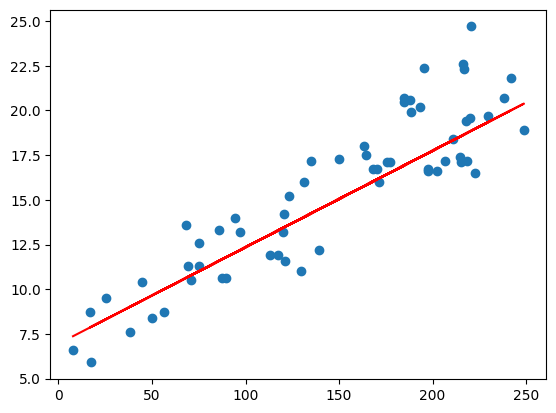

In [36]:
#Visualizing the fit on the test set
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.948 + 0.054 * X_test, 'r')
plt.show()

***Concluding with saying that above mention solution is successfully able to predict the sales using advertising platform datasets.***